# Bigmart Sales 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as  sm
from sklearn.preprocessing import MinMaxScaler as mms

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/akki8087/Big-Mart-Sales/master/Train.csv")
data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [3]:
dummy=pd.get_dummies(data)
print(dummy)

      Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0           9.300         0.016047  249.8092                       1999   
1           5.920         0.019278   48.2692                       2009   
2          17.500         0.016760  141.6180                       1999   
3          19.200         0.000000  182.0950                       1998   
4           8.930         0.000000   53.8614                       1987   
...           ...              ...       ...                        ...   
8518        6.865         0.056783  214.5218                       1987   
8519        8.380         0.046982  108.1570                       2002   
8520       10.600         0.035186   85.1224                       2004   
8521        7.210         0.145221  103.1332                       2009   
8522       14.800         0.044878   75.4670                       1997   

      Item_Outlet_Sales  Item_Fat_Content_LF  Item_Fat_Content_Low Fat  \
0             3735.1380  

In [4]:
data.shape

(8523, 10)

In [5]:
data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
data.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
data.Item_Weight.mean()

12.857645184136183

In [8]:
data.Item_Weight.unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [9]:
data.Item_Weight.fillna(12.85,inplace=True)

In [10]:
data.Item_Weight.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x25365b2a730>,
 'caps': [<matplotlib.lines.Line2D at 0x25365b2ad90>,
 'boxes': [<matplotlib.lines.Line2D at 0x25365b2a2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x25365b3a4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25365b3a880>],
 'means': []}

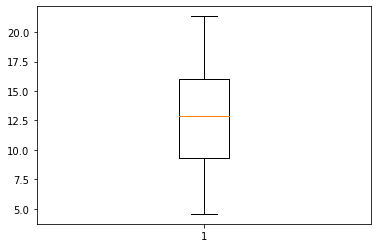

In [11]:
plt.boxplot(data.Item_Weight)

In [12]:
stats.shapiro(data.Item_Weight)

C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.96797776222229, pvalue=8.656072847857974e-40)

In [13]:
stats.pearsonr(data.Item_Weight,data.Item_Outlet_Sales)

(0.011494967105270478, 0.2886463383465571)

<H6>
WEIGHT affects sales p<0.05
<H6>

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

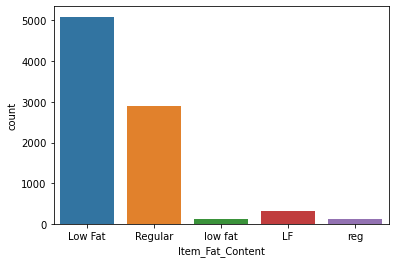

In [14]:
sns.countplot(data.Item_Fat_Content)

In [15]:
data.Item_Fat_Content.replace(['Low Fat','Regular','LF','reg','low fat'],[0,1,0,1,0],inplace=True)

In [16]:
data.Item_Fat_Content.value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

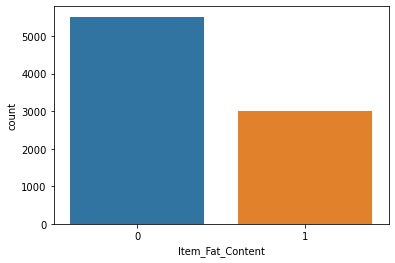

In [17]:
sns.countplot(data.Item_Fat_Content)

In [18]:
part1=data.Item_Outlet_Sales[data.Item_Fat_Content==0]
part2=data.Item_Outlet_Sales[data.Item_Fat_Content==1]
stats.f_oneway(part1,part2)

F_onewayResult(statistic=2.98666429015733, pvalue=0.08398916967694944)

<H6>
fat not affects sales p>0.05
<H6>

<H6>
Hypothesis testing----item visibility and sales
<H6>

In [19]:
data.Item_Visibility.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x2536aa89070>,
 'caps': [<matplotlib.lines.Line2D at 0x2536aa89790>,
 'boxes': [<matplotlib.lines.Line2D at 0x2536aa7aca0>],
 'medians': [<matplotlib.lines.Line2D at 0x2536aa89eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2536aa96280>],
 'means': []}

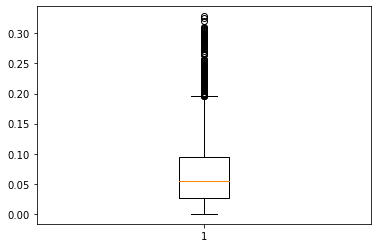

In [20]:
plt.boxplot(data.Item_Visibility)

In [21]:
stats.shapiro(data.Item_Visibility)

C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.914004385471344, pvalue=0.0)

In [22]:
stats.pearsonr(data.Item_Visibility,data.Item_Outlet_Sales)

(-0.1286246122207702, 9.041287180034548e-33)

### item visibility rejected weak strength


### hypothesis testing item type


In [23]:
data.Item_Type.describe()

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

In [24]:
data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [25]:
data.Item_Type.isnull().sum()

0

In [26]:
data.Item_Type.replace(['Fruits and Vegetables','Snack Foods','Household','Frozen Foods','Dairy','Canned', 'Baking Goods','Health and Hygiene','Soft Drinks','Meat','Breads','Hard Drinks','Others','Starchy Foods','Breakfast','Seafood'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],inplace=True)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

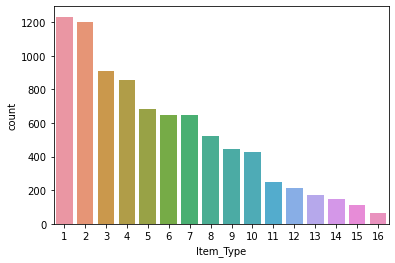

In [27]:
sns.countplot(data.Item_Type)

In [28]:
part1=data.Item_Outlet_Sales[data.Item_Type==1]
part2=data.Item_Outlet_Sales[data.Item_Type==2]
part3=data.Item_Outlet_Sales[data.Item_Type==3]
part4=data.Item_Outlet_Sales[data.Item_Type==4]
part5=data.Item_Outlet_Sales[data.Item_Type==5]
part6=data.Item_Outlet_Sales[data.Item_Type==6]
part7=data.Item_Outlet_Sales[data.Item_Type==7]
part8=data.Item_Outlet_Sales[data.Item_Type==8]
part9=data.Item_Outlet_Sales[data.Item_Type==9]
part10=data.Item_Outlet_Sales[data.Item_Type==10]
part11=data.Item_Outlet_Sales[data.Item_Type==11]
part12=data.Item_Outlet_Sales[data.Item_Type==12]
part13=data.Item_Outlet_Sales[data.Item_Type==13]
part14=data.Item_Outlet_Sales[data.Item_Type==14]
part15=data.Item_Outlet_Sales[data.Item_Type==15]
part16=data.Item_Outlet_Sales[data.Item_Type==16]
stats.f_oneway(part1,part2,part3,part4,part5,part6,part7,part8,part9,part10,part11,part12,part13,part14,part15,part16)

F_onewayResult(statistic=2.7006532875210416, pvalue=0.00038843993766501125)

### item mrp hypothesis testing
    


{'whiskers': [<matplotlib.lines.Line2D at 0x2536bb76ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x2536bb85220>,
 'boxes': [<matplotlib.lines.Line2D at 0x2536bb76730>],
 'medians': [<matplotlib.lines.Line2D at 0x2536bb85940>],
 'fliers': [<matplotlib.lines.Line2D at 0x2536bb85cd0>],
 'means': []}

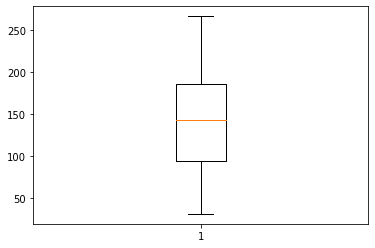

In [29]:
plt.boxplot(data.Item_MRP)

In [30]:
stats.shapiro(data.Item_MRP)

C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9715956449508667, pvalue=5.629270967513297e-38)

In [31]:
stats.pearsonr(data.Item_MRP,data.Item_Outlet_Sales)

(0.5675744466569191, 0.0)

### item mrp rejected weak


### OUTLET SIZE HYPOTHESIS


In [32]:
data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [33]:
data.Outlet_Size.fillna('others',inplace=True)

In [34]:
data.Outlet_Size.isnull().sum()

0

In [35]:
pd.get_dummies(data.Outlet_Size)

,High,Medium,Small,others
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
8518,1,0,0,0
8519,0,0,0,1
8520,0,0,1,0
8521,0,1,0,0


In [36]:
dummy=pd.get_dummies(data)
print(dummy)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 0         0.016047          5  249.8092   
1           5.920                 1         0.019278          9   48.2692   
2          17.500                 0         0.016760         10  141.6180   
3          19.200                 1         0.000000          1  182.0950   
4           8.930                 0         0.000000          3   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 0         0.056783          2  214.5218   
8519        8.380                 1         0.046982          7  108.1570   
8520       10.600                 0         0.035186          8   85.1224   
8521        7.210                 1         0.145221          2  103.1332   
8522       14.800                 0         0.044878          9   75.4670   

      Outlet_Establishment_Year  Item_Outlet_Sales  Outlet_Size_High  \
0  

In [37]:
data.Outlet_Size.replace(['Medium','Small','High','others'],[1,2,3,4],inplace=True)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

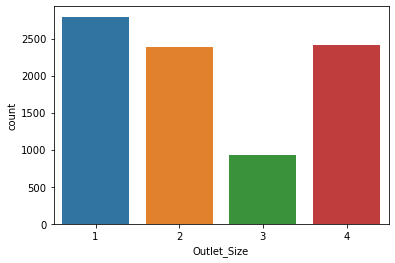

In [38]:
sns.countplot(data.Outlet_Size)

In [39]:
part1=data.Item_Outlet_Sales[data.Outlet_Size==1]
part2=data.Item_Outlet_Sales[data.Outlet_Size==2]
part3=data.Item_Outlet_Sales[data.Outlet_Size==3]
part4=data.Item_Outlet_Sales[data.Outlet_Size==4]
stats.f_oneway(part1,part2,part3,part4)

F_onewayResult(statistic=143.65746681352238, pvalue=8.228023520649935e-91)

### hypothesis testing Outlet Location Type
 

In [40]:
data.Outlet_Location_Type.isnull().sum()

0

In [41]:
data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [42]:
data.Outlet_Location_Type.replace(['Tier 3','Tier 2','Tier 1'],[3,2,1],inplace=True)


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

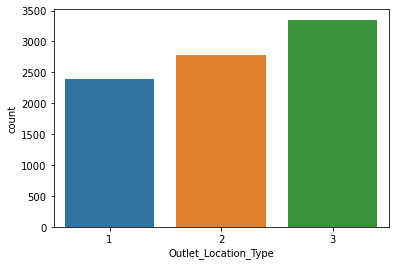

In [43]:
sns.countplot(data.Outlet_Location_Type)

In [44]:
part1=data.Item_Outlet_Sales[data.Outlet_Location_Type=='1']
part2=data.Item_Outlet_Sales[data.Outlet_Location_Type=='2']
part3=data.Item_Outlet_Sales[data.Outlet_Location_Type=='3']
stats.f_oneway(part1,part2,part3)

C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

### Outlet type


In [45]:
data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [46]:
data.Outlet_Type.replace(['Supermarket Type1','Grocery Store','Supermarket Type3','Supermarket Type2'],[0,1,2,3],inplace=True)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

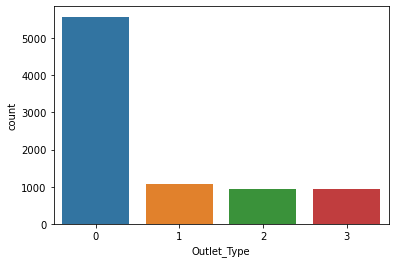

In [47]:
sns.countplot(data.Outlet_Type)

In [48]:
part1=data.Item_Outlet_Sales[data.Outlet_Type==1]
part2=data.Item_Outlet_Sales[data.Outlet_Type==2]
part3=data.Item_Outlet_Sales[data.Outlet_Type==3]
part4=data.Item_Outlet_Sales[data.Outlet_Type==0]
stats.f_oneway(part1,part2,part3,part4)

F_onewayResult(statistic=894.6500119018013, pvalue=0.0)

### Outlet type affects sales


In [49]:
dummy=pd.get_dummies(dummy,columns=['Outlet_Establishment_Year'])

In [50]:
dummy.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Item_Outlet_Sales', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Size_others',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_Establishment_Year_1985',
       'Outlet_Establishment_Year_1987', 'Outlet_Establishment_Year_1997',
       'Outlet_Establishment_Year_1998', 'Outlet_Establishment_Year_1999',
       'Outlet_Establishment_Year_2002', 'Outlet_Establishment_Year_2004',
       'Outlet_Establishment_Year_2007', 'Outlet_Establishment_Year_2009'],
      dtype='object')